In [1]:
from google.colab import files
uploaded = files.upload()

Saving nslkdd-version1.csv to nslkdd-version1 (1).csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving nslkdd-version2.csv to nslkdd-version2 (1).csv


In [3]:
from functools import reduce
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df= pd.read_csv('nslkdd-version1.csv')

In [0]:
df1= pd.read_csv('nslkdd-version2.csv')

In [6]:
#checking missing value
df.apply(lambda x: x.isnull().sum())

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

In [7]:
#checking missing value 
df1.apply(lambda x: x.isnull().sum())

a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

In [8]:
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [9]:
df1.head()

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [10]:
df1.tail()

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
25187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,7,0.0,0.0,1.0,1.0,0.07,0.07,0.0,255,7,0.03,0.06,0.00,0.00,0.0,0.0,1.0,1.0,1
25188,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1,39,1.00,0.00,1.00,0.18,0.0,0.0,0.0,0.0,3
25189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,7,0.0,0.0,1.0,1.0,0.07,0.07,0.0,255,13,0.05,0.07,0.00,0.00,0.0,0.0,1.0,1.0,1
25190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,18,1.0,1.0,0.0,0.0,0.14,0.06,0.0,255,20,0.08,0.06,0.00,0.00,1.0,1.0,0.0,0.0,1
25191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,9,1.0,1.0,0.0,0.0,0.24,0.11,0.0,255,49,0.19,0.03,0.01,0.00,1.0,1.0,0.0,0.0,1


In [11]:
#data is not sparse 
df1.dtypes.apply(pd.api.types.is_sparse) 

a7     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a14    False
a15    False
a16    False
a17    False
a18    False
a19    False
a20    False
a21    False
a22    False
a23    False
a24    False
a25    False
a26    False
a27    False
a28    False
a29    False
a30    False
a31    False
a32    False
a33    False
a34    False
a35    False
a36    False
a37    False
a38    False
a39    False
a40    False
a41    False
a42    False
dtype: bool

In [0]:
#Replacing categorical values with numbers
numbers = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['a2'].replace(numbers, inplace=True)

In [13]:
df.a2.value_counts()

0    20526
1     3011
2     1655
Name: a2, dtype: int64

In [14]:
df.a3.value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
pm_dump         3
red_i           3
tim_i           2
http_8001       1
Name: a3, Length: 66, dtype: int64

In [15]:
word = set(df.a3)
print(word)

{'uucp', 'time', 'smtp', 'ftp', 'finger', 'IRC', 'http_8001', 'whois', 'csnet_ns', 'sql_net', 'X11', 'mtp', 'printer', 'ftp_data', 'supdup', 'domain', 'telnet', 'ntp_u', 'nntp', 'imap4', 'echo', 'daytime', 'urh_i', 'gopher', 'sunrpc', 'systat', 'login', 'shell', 'remote_job', 'red_i', 'ecr_i', 'netbios_dgm', 'ldap', 'auth', 'netbios_ns', 'pm_dump', 'urp_i', 'nnsp', 'rje', 'netstat', 'link', 'domain_u', 'ctf', 'courier', 'bgp', 'other', 'http', 'iso_tsap', 'klogin', 'efs', 'kshell', 'tim_i', 'private', 'hostnames', 'vmnet', 'ssh', 'pop_3', 'name', 'pop_2', 'uucp_path', 'discard', 'netbios_ssn', 'eco_i', 'exec', 'Z39_50', 'http_443'}


In [0]:
numbers2 = {'IRC':1, 'X11':2, 'Z39_50':3, 'auth':4, 'bgp':5, 'courier':6, 'csnet_ns':7, 'ctf':8, 'daytime':9, 'discard':10,
 'domain':11, 'domain_u':12, 'echo':13, 'eco_i':14, 'ecr_i':15, 'efs':16, 'exec':17, 'finger':18, 'ftp':19, 'ftp_data':20,
 'gopher':21, 'hostnames':22, 'http':23, 'http_443':24, 'http_8001':25, 'imap4':26, 'iso_tsap':27, 'klogin':28, 'kshell':29,
 'ldap':30, 'link':31, 'login':32, 'mtp':33, 'name':34, 'netbios_dgm':35, 'netbios_ns':36, 'netbios_ssn':37, 'netstat':38, 'nnsp':39,
 'nntp':40, 'ntp_u':41, 'other':42, 'pm_dump':43, 'pop_2':44, 'pop_3':45, 'printer':46, 'private':47, 'red_i':48, 'remote_job':49, 'rje':50,
 'shell':51, 'smtp':52, 'sql_net':53, 'ssh':54, 'sunrpc':55, 'supdup':56, 'systat':57, 'telnet':58, 'tim_i':59, 'time':60, 'urh_i':61,
 'urp_i':62, 'uucp':63, 'uucp_path':64, 'vmnet':65, 'whois':66}
df['a3'].replace(numbers2, inplace=True)

In [17]:
df.a3.value_counts()

23    8003
47    4351
12    1820
52    1449
20    1396
      ... 
61       4
43       3
48       3
59       2
25       1
Name: a3, Length: 66, dtype: int64

In [18]:
df.a4.value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
S2           21
RSTOS0       21
S3           15
OTH           5
Name: a4, dtype: int64

In [19]:
word2 = set(df.a4)
print(word2)

{'REJ', 'SF', 'S1', 'RSTO', 'S3', 'RSTOS0', 'OTH', 'S0', 'RSTR', 'SH', 'S2'}


In [0]:
numbers3 = {'OTH':1, 'REJ':2, 'RSTO':3, 'RSTOS0':4, 'RSTR':5, 'S0':6, 'S1':7, 'S2':8, 'S3':9, 'SF':10, 'SH':11}
df['a4'].replace(numbers3, inplace=True)

In [21]:
df.a4.value_counts()

10    14973
6      7009
2      2216
5       497
3       304
7        88
11       43
8        21
4        21
9        15
1         5
Name: a4, dtype: int64

In [22]:
#Checking the values in the column
df.a42.value_counts()

normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
phf                    2
multihop               2
loadmodule             1
land                   1
spy                    1
ftp_write              1
Name: a42, dtype: int64

In [23]:
word3 = set(df.a42)
print(word3)

{'spy', 'neptune', 'portsweep', 'back', 'teardrop', 'smurf', 'imap', 'nmap', 'satan', 'warezmaster', 'loadmodule', 'buffer_overflow', 'guess_passwd', 'ftp_write', 'pod', 'phf', 'normal', 'multihop', 'warezclient', 'rootkit', 'ipsweep', 'land'}


In [0]:
numbers4 = {'back':1, 'buffer_overflow':2, 'ftp_write':3, 'guess_passwd':4, 'imap':5, 'ipsweep':6, 'land':7, 'loadmodule':8,
 'multihop':9, 'neptune':10, 'nmap':11, 'normal':12, 'phf':13, 'pod':14, 'portsweep':15, 'rootkit':16, 'satan':17, 'smurf':18,
 'spy':19, 'teardrop':20, 'warezclient':21, 'warezmaster':22}
df['a42'].replace(numbers4, inplace=True)

In [25]:
df.a42.value_counts()

12    13449
10     8282
6       710
17      691
15      587
18      529
11      301
1       196
20      188
21      181
14       38
4        10
22        7
2         6
5         5
16        4
9         2
13        2
7         1
19        1
3         1
8         1
Name: a42, dtype: int64

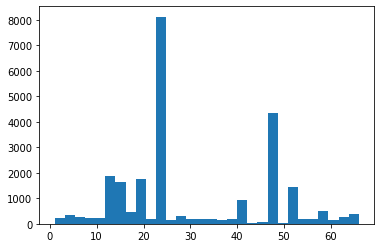

In [26]:
#Checking scalability 
plt.hist(df['a3'], bins=30)
plt.show()

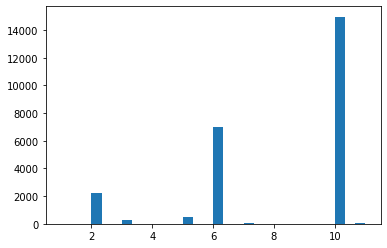

In [27]:
plt.hist(df['a4'], bins=30)
plt.show()

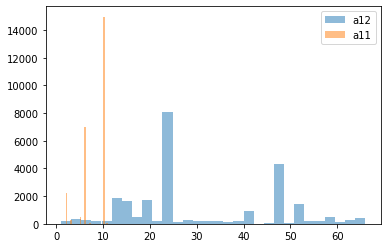

In [28]:
a3 = [df['a3']]
a4 = [df['a4']]
plt.hist(a3, alpha=0.5, label='a12', bins=30)
plt.hist(a4, alpha=0.5, label='a11', bins=30)
plt.legend(loc='upper right')
plt.show()

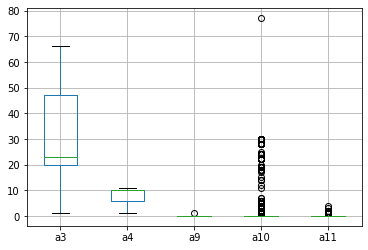

In [29]:
df.boxplot(column = ['a3', 'a4', 'a9', 'a10', 'a11'])

Apparently, there is scalability issue in the dataset but thanks to the functionality of random forest which is quite robust to handle either categorical, numerical variables easily. Therefore, there is  no need to change scale by means of standartization, normalization. 

In [30]:
#data is not sparse
df.dtypes.apply(pd.api.types.is_sparse)

a1     False
a2     False
a3     False
a4     False
a5     False
a6     False
a7     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a14    False
a15    False
a16    False
a17    False
a18    False
a19    False
a20    False
a21    False
a22    False
a23    False
a24    False
a25    False
a26    False
a27    False
a28    False
a29    False
a30    False
a31    False
a32    False
a33    False
a34    False
a35    False
a36    False
a37    False
a38    False
a39    False
a40    False
a41    False
a42    False
dtype: bool

In [0]:
#Finding duplicate columns
def DuplicateColumn(df):
    DuplicateColumns= set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            others = df.iloc[:, y]
            if col.equals(others):
                DuplicateColumns.add(df.columns.values[y])
 
    return list(DuplicateColumns)

In [0]:
my_duplicates = DuplicateColumn(df)

In [33]:
print('Please find duplicate columns:')
for col in my_duplicates:
    print('Column name : ', col)

Please find duplicate columns:
Column name :  a21


Although there is duplicate column which is extra noise model can still perform better by choosing the needed datasets. Here bootstraping and later in test phase bagging overcome any such issue. 

In [34]:
df['a42'].value_counts()

12    13449
10     8282
6       710
17      691
15      587
18      529
11      301
1       196
20      188
21      181
14       38
4        10
22        7
2         6
5         5
16        4
9         2
13        2
7         1
19        1
3         1
8         1
Name: a42, dtype: int64

In [35]:
Cor1=df
correlated_features = set()
correlation_matrix = Cor1.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'a16', 'a22', 'a26', 'a28', 'a34', 'a38', 'a39', 'a40', 'a41'}

In [36]:
Cor1=df1
correlated_features = set()
correlation_matrix = Cor1.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features

{'a10', 'a18', 'a22', 'a26', 'a28', 'a34', 'a38', 'a39', 'a40', 'a41', 'a9'}

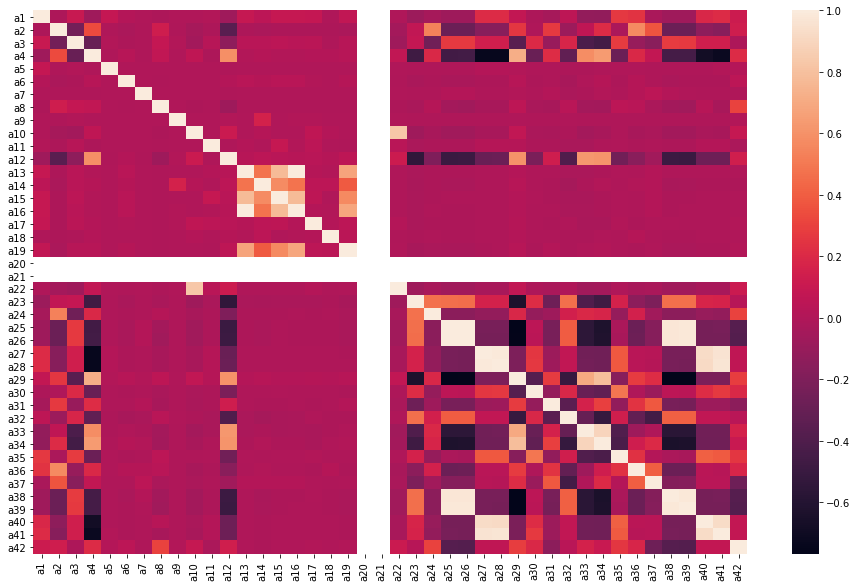

In [37]:
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)
plt.show()

In [38]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [39]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

Based on correlation matrix and for loop one can claim that correlated features are still problem. After comparing 2 datasets I decided to continue with the 1st dataset because of labels and correlated features. Labels are not given in the 2nd dataset. Additionally, there are more correlated features in the 2nd dataset. 

This model will firstly use base model to train. Later on feature selection process will allow to choose the needed features. In the end two results will be compared. 

In [0]:
# Using numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(df['a42'])
# Removing the labels from the features
# axis 1 refers to the columns
df= df.drop('a42', axis = 1)
# Saving feature names for later use
df_list = list(df.columns)
# Converting to numpy array
df = np.array(df)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets. Default splitting.
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 42)

In [42]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (18894, 41)
Training Labels Shape: (18894,)
Testing Features Shape: (6298, 41)
Testing Labels Shape: (6298,)


In [43]:
# The baseline predictions are the protocol column by which we can predict error
baseline_preds = test_features[:, df_list.index('a2')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  11.24


In [44]:
# Importing the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiating model with 1000 decision trees. As data is quite big arbitrary number is used.
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Training the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [45]:
# Using the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculating the absolute errors
errors = abs(predictions - test_labels)
# Printing out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.04 .


In [46]:
# Calculating mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculating and displaying accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.29 %.


Accuracy result is totally satisfactory. MAE shows that model performed quite well.

**Feature importance**

In [47]:
# Getting numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df, round(importance, 2)) for df, importance in zip(df_list, importances)]
# Sorting the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Printing out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: a5                   Importance: 0.15
Variable: a37                  Importance: 0.15
Variable: a38                  Importance: 0.13
Variable: a23                  Importance: 0.12
Variable: a13                  Importance: 0.09
Variable: a8                   Importance: 0.08
Variable: a35                  Importance: 0.05
Variable: a10                  Importance: 0.03
Variable: a32                  Importance: 0.03
Variable: a40                  Importance: 0.03
Variable: a3                   Importance: 0.02
Variable: a6                   Importance: 0.02
Variable: a34                  Importance: 0.02
Variable: a36                  Importance: 0.02
Variable: a1                   Importance: 0.01
Variable: a2                   Importance: 0.01
Variable: a24                  Importance: 0.01
Variable: a4                   Importance: 0.0
Variable: a7                   Importance: 0.0
Variable: a9                   Importance: 0.0
Variable: a11                  Importance: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In order to compare the results with previous model I run new random forest with only the two most important variables.

In [48]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extracting the two most important features
important_indices = [df_list.index('a5'), df_list.index('a37')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Training the random forest
rf_most_important.fit(train_important, train_labels)
# Making predictions and determining the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Displaying the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.47 degrees.
Accuracy: 95.47 %.


***As a matter of fact, after using only 2 features it is clear that  there is no need to use all of the variables. Above outlined variables yield good results.***

Text(0.5, 1.0, 'Variable Importances')

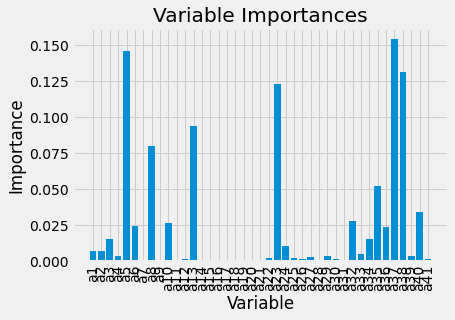

In [49]:
#Visualizing feature importance. It is quite obvious that a5 and a37 are the most important variables for this model.
# Importing matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Seting the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Making a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Ticking labels for x axis
plt.xticks(x_values, df_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')